# ***1차시: 이미지 데이터의 표현 방법과 학습 원리***

### 사전 준비: Opencv 설치
- opencv-python: 이미지 처리 도구 입니다
- matplotlib: 시각화 도구 입니다

In [1]:
! pip3 install opencv-python matplotlib

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)


### ***grid 이미지 열어보기***
- 이 이미지는 5x4 크기의 바둑판 무늬 이미지 입니다
- 이미지에 어떠한 정보가 있었기 때문에 이러한 그림이 나온 것일까요?
- 컴퓨터의 파일상에 그림이 채색된 것은 아닙니다
- 어떠한 숫자 정보가 기록되어 있고 그것을 이미지 출력 도구가 모니터에 채색을 해준 것입니다

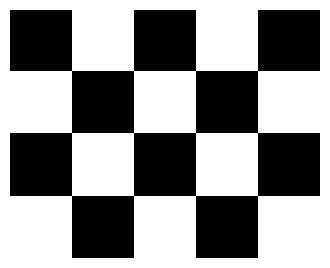

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("grid.bmp")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,5))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### ***이미지에 실제 들어있던 내용***
- 5x4 크기의 바둑판 처럼 생긴 그림 파일을 읽어봅니다
- 행렬과 같은 출력이 확인됩니다
  - 2차원 행렬이 4개 나왔습니다
  - 4개의 각 행렬그룹은 y축을 나타냅니다
  - 각 행렬그룹 내에 있는 각 행은 x축을 나타냅니다
  - 각 행의 성분은 색상입니다
- 표현하고자 하는 성분이 3개 입니다
  - 따라서 이 행렬은 3차원 행렬입니다
  - 이미지는 x축 성분, y축 성분, 색상 성분을 표현하는 3차원 행렬입니다

In [30]:
import cv2 as cv

img = cv.imread('grid.bmp')

print(img)

[[[  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]]

 [[  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]]]


### ***색상성분 알아보기***
- 3개의 원소로 이루어진 색상 정보는 각각 어떤 의미일까요?
- 다른 bmp파일들을 열어보면서 확인해보겠습니다
- 먼저 파란색 격자무늬 파일을 읽어봅니다
- 3개의 원소 중에서 첫번째 원소에만 255라고 적혀있습니다
- 파란색 성분이 0 ~ 255 중에서 255만큼 진하게(최대로) 들어가 있다는 뜻입니다

In [ ]:
import cv2 as cv

blue_img = cv.imread('blue_grid.bmp')

print(blue_img)

[[[  0   0   0]
  [255   0   0]
  [  0   0   0]
  [255   0   0]
  [  0   0   0]]

 [[255   0   0]
  [  0   0   0]
  [255   0   0]
  [  0   0   0]
  [255   0   0]]

 [[  0   0   0]
  [255   0   0]
  [  0   0   0]
  [255   0   0]
  [  0   0   0]]

 [[255   0   0]
  [  0   0   0]
  [255   0   0]
  [  0   0   0]
  [255   0   0]]]


### ***초록색 성분의 위치***
- 3개의 원소 중에서 두번째 원소에만 255라고 적혀있습니다
- 초록색 성분이 0 ~ 255 중에서 255만큼 진하게(최대로) 들어가 있다는 뜻입니다

In [18]:
import cv2 as cv

green_img = cv.imread('green_grid.bmp')

print(green_img)

[[[  0   0   0]
  [  0 255   0]
  [  0   0   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0   0   0]
  [  0 255   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0 255   0]
  [  0   0   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0   0   0]
  [  0 255   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0 255   0]
  [  0   0   0]
  [  0 255   0]]]


### ***붉은색 성분의 위치***
- 3개의 원소 중에서 세번째 원소에만 255라고 적혀있습니다
- 붉은색 성분이 0 ~ 255 중에서 255만큼 진하게(최대로) 들어가 있다는 뜻입니다

In [19]:
import cv2 as cv

red_img = cv.imread('red_grid.bmp')

print(red_img)

[[[  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]]

 [[  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]]

 [[  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]]

 [[  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]]]


### ***이미지 기록하기***
- 방금 읽은 붉은색 격자무늬 파일을 jpg 파일로 기록해봅니다
- 이어서 파일이 생성된 것을 확인합니다

In [25]:
import cv2 as cv

red_img = cv.imread('red_grid.bmp')
cv.imwrite('red_grid.jpg', red_img)

True

### ***달라진 결과***
- 기록한 것을 그대로 읽었을 뿐인데 다른 결과가 나옵니다
- 255와 0으로만 구성되어 있던 숫자가 달라졌습니다
- jpg 는 손실압축 인코딩을 사용하기 때문에 디코딩 했을 때 원본 그대로 복원되지 않습니다

In [21]:
img_jpg = cv.imread('red_grid.jpg')
print(img_jpg)

[[[  0   0  90]
  [ 39  38 166]
  [  0   0  90]
  [ 40  39 167]
  [  0   0  90]]

 [[ 40  39 167]
  [  0   0  92]
  [ 39  38 166]
  [  0   0  91]
  [ 41  40 168]]

 [[  0   0  90]
  [ 38  37 165]
  [  0   0  90]
  [ 37  36 164]
  [  0   0  90]]

 [[ 41  40 168]
  [  0   0  90]
  [ 42  41 169]
  [  0   0  94]
  [ 37  36 164]]]


### ***다시 bmp로 기록해봅니다***
- bmp 포맷은 무손실이기 때문에 기록 후 다시 읽었을 때 원본 그대로 복원 됩니다

In [26]:
import cv2 as cv

red_img = cv.imread('red_grid.bmp')
cv.imwrite('red_grid2.bmp', red_img)

True

In [28]:
img_bmp = cv.imread('red_grid2.bmp')
print(img_bmp)

[[[  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]]

 [[  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]]

 [[  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]]

 [[  0   0 255]
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]]]


### ***png도 무손실***
- png도 bmp처럼 파일로 기록 후 다시 읽었을 때 원본 그대로 복원 되는 것을 확인할 수 있습니다
- 단, 이미지가 커지고 복잡해지면 jpg파일에 비해 용량은 커지게 됩니다

In [30]:
import cv2 as cv

red_img = cv.imread('red_grid.bmp')
cv.imwrite('red_grid.png', img_bmp)

True

In [31]:
img_png = cv.imread('red_grid.png')

In [ ]:
print(img_png)

### ***흑백 이미지로 바꾸기***
- 검정색과 흰색으로 이루어진 격자무늬 이미지를 읽어서 흑백으로 변경해봅니다
- 그리고 행렬이 어떻게 바뀌었는지 확인해봅시다
- 색상성분이 3개에서 1개로 줄어든 것을 확인할 수 있습니다
- 이제는 2차원 행렬이 되었습니다

In [32]:
import cv2 as cv

img_color = cv.imread('grid.bmp')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
print(img_gray)

[[  0 255   0 255   0]
 [255   0 255   0 255]
 [  0 255   0 255   0]
 [255   0 255   0 255]]


### ***흑백 이미지를 저장하고 읽어보기***
- 이상하게도 다시 3차원이 되었습니다
- 이미지 파일 자체는 3차원으로 기록이 됩니다
- 우리가 읽을때 흑백이미지로 읽어야 합니다

In [35]:
import cv2 as cv

img_color = cv.imread('grid.bmp')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imwrite('grid_grayscale.bmp', img_gray)

img_gray = cv.imread('grid_grayscale.bmp')
print(img_gray)

[[[  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]]

 [[  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [255 255 255]]]


### ***흑백 이미지 옵션으로 다시 읽기***
- 흑백 이미지 옵션을 넣어서 읽으면 2차원 행렬이 된것을 확인할 수 있습니다
- 원본 색상이 완전한 검정색과 완전한 흰색으로만 이루어져 있었기 때문에 흑백 변환 전후로 시각적인 변화가 체감되지 않습니다
- 이제 검정색이 아닌 다른 색상의 이미지로 다시 테스트 해봅시다

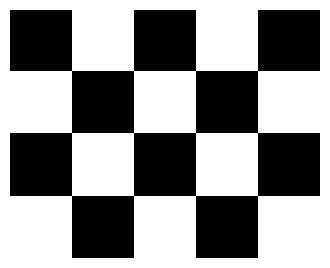

[[  0 255   0 255   0]
 [255   0 255   0 255]
 [  0 255   0 255   0]
 [255   0 255   0 255]]


In [42]:
import cv2 as cv

img_color = cv.imread('grid.bmp')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imwrite('grid_grayscale.bmp', img_gray)

img_gray = cv.imread('grid_grayscale.bmp')
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,5))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

img_gray = cv.imread('grid_grayscale.bmp', cv.IMREAD_GRAYSCALE)
print(img_gray)

### ***붉은색 격자무늬 이미지 흑백으로 저장하기***
- 확실히 흑백이미지 같기는 합니다
- 그러나 색상 성분은 컬러 이미지가 맞습니다
- 이미지 파일 자체에는 3차원 행렬로 색상성분이 모두 표현되는 것입니다
- 흑백이미지가 이미지 파일로 저장된다는 것은 컬러성분을 이용해 흑백 색상이 만들어지고 그것을 저장한 것입니다

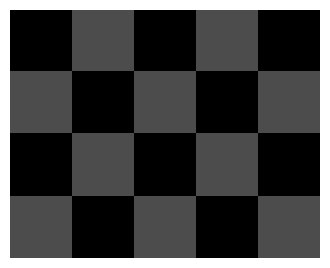

[[[ 0  0  0]
  [76 76 76]
  [ 0  0  0]
  [76 76 76]
  [ 0  0  0]]

 [[76 76 76]
  [ 0  0  0]
  [76 76 76]
  [ 0  0  0]
  [76 76 76]]

 [[ 0  0  0]
  [76 76 76]
  [ 0  0  0]
  [76 76 76]
  [ 0  0  0]]

 [[76 76 76]
  [ 0  0  0]
  [76 76 76]
  [ 0  0  0]
  [76 76 76]]]


In [41]:
import cv2 as cv

img_color = cv.imread('red_grid.bmp')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imwrite('red_grid_grayscale.bmp', img_gray)

img_gray = cv.imread('red_grid_grayscale.bmp')
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,5))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
print(img_gray)

### ***우리만의 이미지 포맷을 만들어 봅시다***
- 숫자 하나씩 쓰고 줄바꿈이 나오는 포맷입니다
- 맨처음 3행은 높이, 너비, 색상 수 입니다
- 그 밑으로는 왼쪽 위부터 오른쪽 아래로 내려가면서 나오는 픽셀별 채널 색상 정보입니다

In [44]:
import cv2 as cv

img = cv.imread('red_grid.bmp')

height, width, channel = img.shape

f = open('red_grid.txt', 'w')
f.write(str(height))
f.write('\n')
f.write(str(width))
f.write('\n')
f.write(str(channel))
f.write('\n')

for h in range(0, height):
    for w in range(0, width):
        for c in range(0, channel):
            f.write(str(img[h][w][c]))
            f.write('\n')

f.close()


### ***우리만의 이미지 포맷을 읽어봅시다***
- 똑같이 읽어지는지 확인해봅니다
- 그저 숫자가 써있는 텍스트파일이었는데 이미지였습니다
- 따라서 이미지는 그저 숫자가 써있는 정보 라는 것을 알 수 있습니다

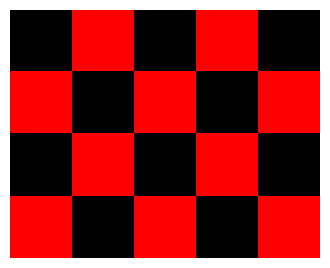

In [51]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

f = open('red_grid.txt', 'r')

height = int(f.readline().strip())
width  = int(f.readline().strip())
channel  = int(f.readline().strip())

myimg = np.arange(height*width*channel)
myimg = myimg.reshape(height, width, channel)

for h in range(0, height):
    for w in range(0, width):
        for c in range(0, channel):
            myimg[h][w][c] = int(f.readline().strip())

myimg = cv.cvtColor(myimg.astype(np.uint8), cv.COLOR_BGR2RGB)
plt.figure(figsize=(4,5))
plt.imshow(myimg)
plt.axis('off')
plt.show()

### ***텍스트 파일을 수정해서 이미지를 변경해봅니다***
- 255로 되어있는 숫자 하나를 변경해봅시다

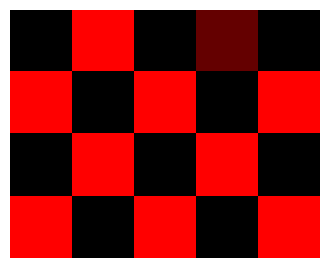

In [52]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

f = open('red_grid.txt', 'r')

height = int(f.readline().strip())
width  = int(f.readline().strip())
channel  = int(f.readline().strip())

myimg = np.arange(height*width*channel)
myimg = myimg.reshape(height, width, channel)

for h in range(0, height):
    for w in range(0, width):
        for c in range(0, channel):
            myimg[h][w][c] = int(f.readline().strip())

myimg = cv.cvtColor(myimg.astype(np.uint8), cv.COLOR_BGR2RGB)
plt.figure(figsize=(4,5))
plt.imshow(myimg)
plt.axis('off')
plt.show()